In [1]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from src.data_exploration.data_exploration import *

<Axes: >

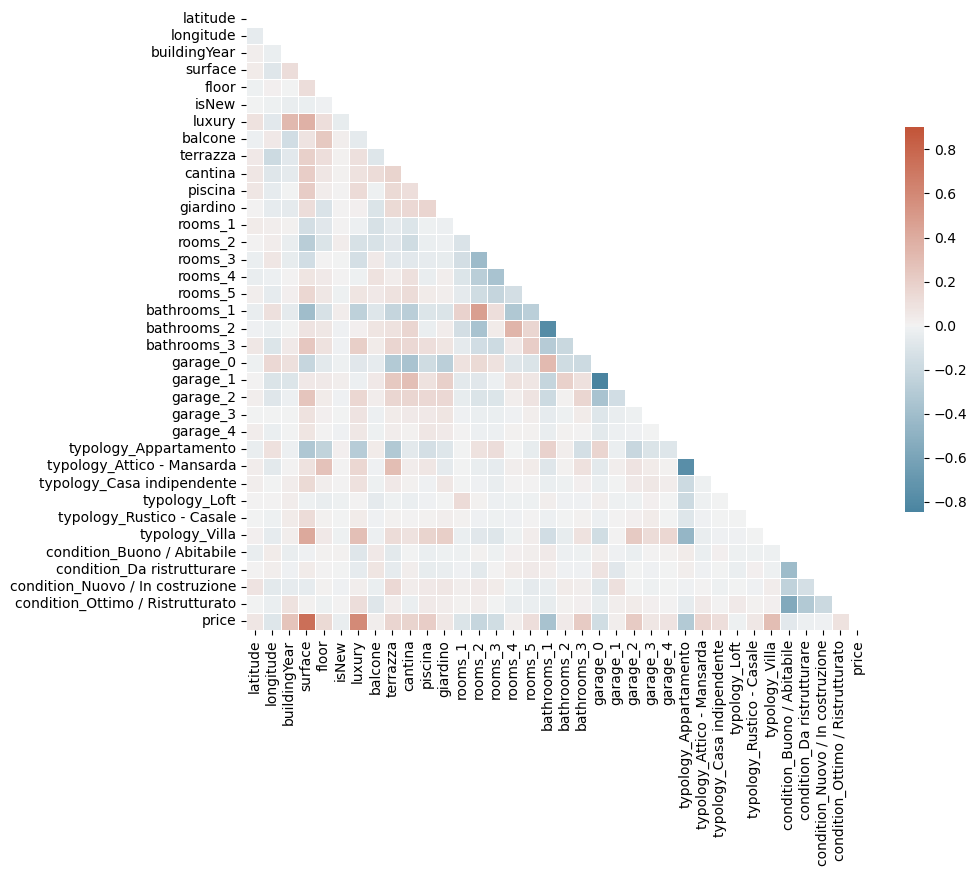

In [2]:
train = read_sqlite_table('train', './data/train_test/train_data.db')
test = read_sqlite_table('test', './data/train_test/test_data.db')

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
train[train.columns[:]].corr()['price'][:]

latitude                            0.063407
longitude                          -0.093074
buildingYear                        0.261471
surface                             0.746599
floor                               0.135737
isNew                              -0.039571
luxury                              0.587037
balcone                             0.023266
terrazza                            0.167875
cantina                             0.169817
piscina                             0.209217
giardino                            0.054051
rooms_1                            -0.104496
rooms_2                            -0.219340
rooms_3                            -0.161676
rooms_4                             0.025675
rooms_5                             0.108254
bathrooms_1                        -0.364404
bathrooms_2                         0.041219
bathrooms_3                         0.219918
garage_0                           -0.162133
garage_1                            0.021268
garage_2  

In [5]:
train_target = train['price'].to_numpy()
train_data = train.drop('price', axis=1).to_numpy()
test_target = test['price'].to_numpy()
test_data = test.drop('price', axis=1).to_numpy()

In [6]:
train_target.shape, train_target.shape, test_target.shape, test_data.shape

((11899,), (11899,), (2975,), (2975, 35))

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [11]:
np.save( './data/train_test/train_data.npy', train_data)
np.save( './data/train_test/test_data.npy', test_data)
np.save( './data/train_test/train_target.npy', train_target)
np.save( './data/train_test/test_target.npy', test_target)

In [9]:
scaler

StandardScaler()

In [12]:
import joblib

In [13]:
joblib.dump(scaler, './model/scaler.save') 

['./model/scaler.save']